# Univariate Distribution Functions 
## A note on the following graphs

The code below ensures the fonts in plots are rendered with LaTex.
This function adjusts matplotlib settings for a uniform feel in the textbook.
Note that with `usetex=True`, fonts are rendered with LaTeX. This may result in an error if LaTeX is not installed on your system. In that case, you can set `usetex` to `False`.

In [1]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

For each of these distributions, both `Numpy` and `Matplotlib` are needed to generate the graphs. Each graph will also require a different module from `scipy.stats` which we will import separately as you will see below.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## The uniform distribution

The uniform distribution is given by

$$ p(x|\mu,W) = \frac{1}{W}\:\:\text{for}\:\:|x-\mu|\le \frac{W}{2}$$

and zero otherwise. Both the mean and the median are equal to $\mu$, and the width of the 'box' is $W$. For a uniform distribution, every point in the continuous range of $W$ has an equally likely chance of appearing, resulting in the familiar "top-hat" shape.

Additionally, the distribution's shape is unimpacted by varying its location along the x-axis or multiplying x by a scalar, allowing us to define $z=\frac{x-\mu}{W}$ and

$$ p(z) = 1 \text{ for |z| }{\leq \frac{1}{2}}\text{ and } p(z) = 0 \text{ for |z| > }\frac{1}{2} $$

In the following example, we will plot three uniform distributions of different widths with $\mu = 0$. The uniform distribution is implemented in `scipy.stats.uniform` -- after importing the module, we will define $\mu$, $W$, and use `np.linspace` to create a sequence of evenly spaced numbers $x$ to plot against.

In [ ]:
from scipy.stats import uniform

W_values = [1.0, 2.0, 3.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-2, 2, 1000)

Next, we plot the distributions. The `uniform` function takes two main arguments: the left edge and the width of the distribution. To find the left edge, we calculate $\mu - 0.5 W$ for each value of W.

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4.5))

for W, ls in zip(W_values, linestyles):
    left = mu - 0.5 * W 
    dist = uniform(left, W)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\mu=%i,\ W=%i$' % (mu, W))

plt.xlim(-1.7, 1.7)
plt.ylim(0, 1.2)

plt.xlabel('$x$', fontsize = 12)
plt.ylabel(r'$p(x|\mu, W)$', fontsize = 12)
plt.title('Uniform Distribution', fontsize = 12)

plt.legend()
plt.show()

### Useful SciPy functions:

SciPy has built-in functions to calculate descriptive statistics of distribtions -- a few of them are shown below.

In [ ]:
dist = uniform(-0.5,1) # instantiates a uniform distribution with left edge = -0.5 and width = 1 

random = dist.rvs(10) # ten random draws

mean, var, skew, kurt = uniform.stats(moments='mvsk') #first four moments of the distribution

pdfval = dist.pdf(0) # pdf at x = 0
cdfval = dist.cdf(0) # cdf at x = 0
ppfval = dist.ppf(0.5) # returns x value for cdf = 0.5

# We can check that these are the values we would expect by looking at the graph for mu = 0 and W = 1
print(pdfval, cdfval, ppfval)

In [ ]:
print(random)

In [ ]:
print(mean,var,skew,kurt)

## The Gaussian (normal) distribution 

The Gaussian distribution, also known as the normal distribution, is given by

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}\text{exp}\bigg(\frac{-(x-\mu)^2}{2\sigma ^2}\bigg) $$

This distribution shows up often in statistics, and it is recognizable by its familiar "bell" shape. Here, $\mu$ (location parameter) is the mean, and $\sigma$ (scale parameter) is the standard deviation of the function. Thus it follows that Gaussian functions are centered at $\mu$, and its width is dependent on the value of $\sigma$.

In the following example, we will plot three Gaussian distributions of different $\sigma$ values with $\mu = 0$. The Gaussian distribution is implemented in `scipy.stats.norm` -- after importing the module, we will define $\mu$, $\sigma$, and use `np.linspace` to create a sequence of evenly spaced numbers $x$ to plot against.

In [ ]:
from scipy.stats import norm

sigma_values = [0.5, 1.0, 2.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-10, 10, 1000)

Next, we plot the distribution. The `norm` function takes two main arguments: the mean and the standard deviation.

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4.5))

for sigma, ls in zip(sigma_values, linestyles):
    
    dist = norm(mu, sigma)  # creates the gaussian distribution

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma)) # pdf calculated at x

plt.xlim(-5, 5)
plt.ylim(0, 0.85)

plt.xlabel('$x$', fontsize = 12)
plt.ylabel(r'$p(x|\mu,\sigma)$', fontsize = 12)
plt.title('Gaussian Distribution', fontsize = 12)

plt.legend()
plt.show()

### Useful Scipy functions:

In [ ]:
dist = norm(0,2) # instantiates normal distribution with mean = 0, stdev = 2 

random = dist.rvs(10) # ten random draws 

mean, var, skew, kurt = norm.stats(moments='mvsk') #first four moments of the distribution

pdfval = dist.pdf(0) # pdf at x = 0
cdfval = dist.cdf(0) # cdf at x = 0
ppfval = dist.ppf(0.5) # returns x value for cdf = 0.5

# We can check that these are the values we would expect by looking at the graph for mu = 0 and W = 2
print(pdfval, cdfval, ppfval)

In [ ]:
print(random)

In [ ]:
print(mean,var,skew,kurt)

The cumulative distribution function (cdf) for a Gaussian distribution does not have a closed-term solution and is usually expressed as the Gauss error function, which is implemented in `scipy.special`.

In [ ]:
from scipy.special import erf 
erf(1)

## The binomial distribution

The binomial distribution is given by

$$p(k|b,N) = \frac{N!}{k!(N-k)!}b^k(1-b)^{N-k} $$

This distribution differs from the previous two in that it describes the distribution of a **discrete** variable that can only take two values (such as an event occurring or not occuring). We define $b$ as the probability of success, and the distribution of a discrete variable $k$ measures how many times success occurred in $N$ trials. Here, $k$ is an integer (not a real number as in the prior distributions).

In the following example, we will plot three binomial distributions of different $b$ and $N$ values. The binomial distribution is implemented in `scipy.stats.binom` -- after importing the module, we will define $N$, $b$, and use `np.arange` to create a sequence of evenly spaced **integers** $k$ to plot against. 

In [ ]:
from scipy.stats import binom

n_values = [20, 20, 40]
b_values = [0.2, 0.6, 0.6]
linestyles = ['-', '--', ':']
k = np.arange(-1, 200)

Next we plot the distributions.

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4.5))

for (n, b, ls) in zip(n_values, b_values, linestyles):
    
    dist = binom(n, b) # creates a binomial distribution

    plt.plot(k, dist.pmf(k), color='black',linestyle=ls,
             drawstyle= 'steps-mid',
             label=r'$b=%.1f,\ n=%i$' % (b, n))  # pmf calculated at x

plt.xlim(-0.5, 35)
plt.ylim(0, 0.25)

plt.xlabel('$k$', fontsize = 12)
plt.ylabel(r'$p(k|b, n)$', fontsize = 12)
plt.title('Binomial Distribution', fontsize = 12)

plt.legend()
plt.show()

### Useful Scipy functions:

Since we are dealing with a discrete variable, we calculate the pmf (probability mass function) as opposed to the pdf.

In [ ]:
dist = binom(20, 0.6) # instantiates binomial distribution with N = 20, b = 0.6

random = dist.rvs(10) # ten random draws

n, p = 20, 0.6
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk') #first four moments of the distribution

pmfval = dist.pmf(12) # pmf at k=12
cdfval = dist.cdf(12) # cdf at k=12
ppfval = dist.ppf(0.58) # returns k for cdf = 0.58

print(pmfval, cdfval, ppfval)

In [ ]:
print(random)

In [ ]:
print(mean, var, skew, kurt)

Additionally, we can use SciPy to calculate a related distribution: the multinomial distribution, which describes the distribution of M discrete values, each corresponding to a particular probability.

In [ ]:
from numpy.random import multinomial
vals = multinomial(10, pvals=[0.2, 0.3, 0.5]) # pvals sum to 1

## The Poisson distribution

The Poisson distribution is a particular case of the binomial distribution, and thus it's also discrete. If the number of trials, $N$, for a binomial distribution goes to infinity such that the probability of success, $p = k/N$, stays fixed, then the distribution of the number of successes, $k$, is controlled by $\mu = pN$ and given by

$$ p(k|\mu) = \frac{\mu^k\text{exp}(-\mu)}{k!} $$

The Poisson distribution is fully described by its mean, $\mu$.

In the following example, we will plot three Poisson distributions of different $\mu$ values. The Poisson distribution is implemented in `scipy.stats.poisson` -- after importing the module, we will define $\mu$ and use `np.arange` to create a sequence of evenly spaced integers $k$ to plot against.

In [ ]:
from scipy.stats import poisson

k = np.arange(-1, 200)
mu_values = [1, 5, 15]
linestyles = ['-', '--', ':']

We then plot the distributions.

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4.5))

for mu, ls in zip(mu_values, linestyles):
    
    dist = poisson(mu)

    plt.plot(k, dist.pmf(k), color='black',
             linestyle=ls,
             drawstyle = 'steps-mid',
             label=r'$\mu=%i$' % mu)

plt.xlim(-0.5, 30)
plt.ylim(0, 0.4)

plt.xlabel('$k$', fontsize = 12)
plt.ylabel(r'$p(k|\mu)$', fontsize = 12)
plt.title('Poisson Distribution', fontsize = 12)

plt.legend()
plt.show()

### Useful Scipy functions:

Since we are still dealing with a discrete variable, we calculate the pmf rather than a pdf.

In [ ]:
dist = poisson(5) # instantiates poisson distribution with mu = 5

random = dist.rvs(10) # ten random draws

mean, var, skew, kurt = poisson.stats(mu, moments='mvsk') # first four moments of the distribution

pmfval = dist.pmf(5) # pmf at k=5
cdfval = dist.cdf(5) # cdf at k=5
ppfval = dist.ppf(0.6) # returns k for cdf = 0.6

print(pmfval, cdfval, ppfval)

In [ ]:
print(random)

In [ ]:
print(mean, var, skew, kurt)

## The Cauchy (Lorentzian) distribution

The Cauchy, or Lorentzian distribution is defined as 

$$ p(x|\mu,\gamma) = \frac{1}{\pi\gamma}\bigg(\frac{\gamma^2}{\gamma^2+(x-\mu)^2}\bigg) $$

The median and mode are equal to the location parameter $\mu$, and $\gamma$ is the scale parameter known as the interquartile range for  $\{x_i\}$. 

This distribution is different from the ones we've looked at so far in that the mean, variance, standard deviation, and higher moments do not exist. The probability decreases relatively slowly as $|x|$ increases due to the graph's broad tails -- because of this, outliers easily influence and sway the mean. Furthermore, the large scatter around $\mu$ doesn't decrease with the sample size, and the probability of getting an outlier never decreases. Thus, we use a more robust estimator to describe the distribution: the median.

In the following example, we will plot three Cauchy distributions of different $\gamma$ values with $\mu = 0$. The Cauchy distribution is implemented in `scipy.stats.cauchy` -- after importing the module, we will define $\mu$, $\gamma$, and use `np.linspace` to create a sequence of evenly spaced numbers $x$ to plot against.

In [8]:
from scipy.stats import cauchy

gamma_values = [0.5, 1.0, 2.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-10, 10, 1000)

We then plot the distributions.

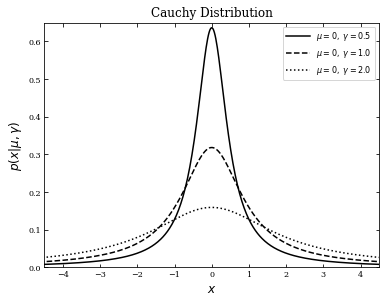

In [9]:
fig, ax = plt.subplots(figsize=(6, 4.5))

for gamma, ls in zip(gamma_values, linestyles):
    dist = cauchy(mu, gamma)

    plt.plot(x, dist.pdf(x), ls=ls, color='black',
             label=r'$\mu=%i,\ \gamma=%.1f$' % (mu, gamma))

plt.xlim(-4.5, 4.5)
plt.ylim(0, 0.65)

plt.xlabel('$x$', fontsize = 12)
plt.ylabel(r'$p(x|\mu,\gamma)$', fontsize = 12)
plt.title('Cauchy Distribution', fontsize = 12)

plt.legend()
plt.show()

### Useful Scipy functions:

In [ ]:
dist = cauchy(0,0.5) # instantiates cauchy distribution with mu = 0, gamma = 0.5

random = dist.rvs(10) # ten random draws

pmfval = dist.pdf(0) # pdf at x=0
cdfval = dist.cdf(0) # cdf at x=0
ppfval = dist.ppf(0.5) # returns x for cdf = 0.5

print(pdfval, cdfval, ppfval)

In [ ]:
print(random)

## The Laplace (exponential) distribution


The Laplace distribution is given by:

$$ p(x|\mu,\Delta) = \frac{1}{2\Delta}\text{exp}\bigg(\frac{-|x-\mu|}{\Delta}\bigg) $$

If we define $x > 0$, the above expression becomes the one-sided exponential distribution. Since the Laplace distribution is symmetric around $\mu$, its mean, mode, and median are $\mu$, and its skewness is 0. The standard deviation is $\sigma = \sqrt{2\Delta}$.

In the following example, we will plot three laplacian distributions with different $\Delta$ values and $\mu = 0$. The Laplacian distribution is implemented in `scipy.stats.laplace` -- after importing the module, we will define $\mu$, $\Delta$, and use `np.linspace` to create a sequence of evenly spaced numbers $x$ to plot against.

In [3]:
from scipy.stats import laplace

delta_values = [0.5, 1.0, 2.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-10, 10, 1000)

Next, we plot the distributions.

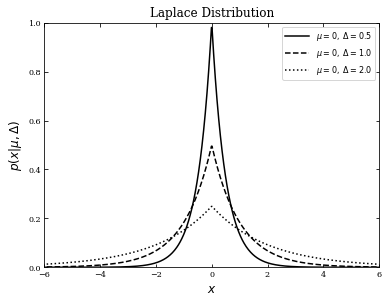

In [4]:
fig, ax = plt.subplots(figsize=(6, 4.5))

for delta, ls in zip(delta_values, linestyles):
    dist = laplace(mu, delta)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\mu=%i,\ \Delta=%.1f$' % (mu, delta))

plt.xlim(-6, 6)
plt.ylim(0, 1.0)

plt.xlabel('$x$', fontsize = 12)
plt.ylabel(r'$p(x|\mu,\Delta)$', fontsize = 12)
plt.title('Laplace Distribution', fontsize = 12)

plt.legend()
plt.show()

We can see the same example but defined for $x>0$. Thus we will use `scipy.stats.expon` instead and change the lower limit of $x$ to zero, excluding zero itself.

In [5]:
from scipy.stats import expon

delta_values = [0.5, 1.0, 2.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(0, 10, 1000)[1:]

Next, we plot the distribution.

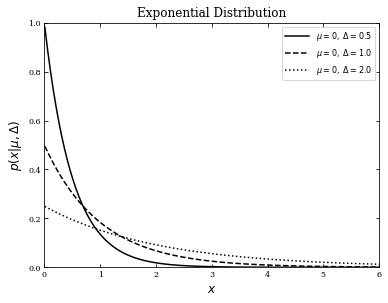

In [7]:
fig, ax = plt.subplots(figsize=(6, 4.5))

for delta, ls in zip(delta_values, linestyles):
    dist = laplace(mu, delta)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\mu=%i,\ \Delta=%.1f$' % (mu, delta))

plt.xlim(0, 6)
plt.ylim(0, 1.0)

plt.xlabel('$x$', fontsize = 12)
plt.ylabel(r'$p(x|\mu,\Delta)$', fontsize = 12)
plt.title('Exponential Distribution', fontsize = 12)

plt.legend()
plt.show()

### Useful SciPy functions

In [ ]:
dist = laplace(0,0.5) # instantiates laplacian distribution with mu = 0, delta = 0.5

random = dist.rvs(10) # ten random draws

mean, var, skew, kurt = laplace.stats(moments='mvsk') # first four moments of the distribution

pmfval = dist.pdf(0) # pdf at x=0
cdfval = dist.cdf(0) # cdf at x=0
ppfval = dist.ppf(0.5) # returns x for cdf = 0.5

print(pdfval, cdfval, ppfval)

In [ ]:
print(random)

In [ ]:
print(mean, var, skew, kurt)

## The $\chi^2$ distribution

The $\chi^2$ distribution has the form:

$$ p(Q|k) \equiv \chi^2(Q|k) = \frac{1}{2^{k/2}\Gamma(k/2)}Q^{k/2-1}\text{exp}(-Q/2)\: \text{for}\: Q>0 $$

It has $k$ degrees of freedom, and $\Gamma$ is the gamma function. The distribution of $Q$ values depends only on the sample size, and not on the actual values of $\mu$ and $\sigma$. If $\mu$ and $\sigma$ are set to 0 and 1, the $\chi^2$ is the sum of $k$ standardized Gaussians.

We can define the $\chi^2$ distribution *per degree of freedom* as

$$\chi^2_{dof}(Q|k) \equiv \chi^2(Q/k|k)$$

The mean value for $\chi^2_{dof}$ is 1, the standard deviation is $\sqrt{2/k}$, and as k increases, $\chi^2_{dof}$ tends to $N(1,\sqrt{2/k})$.

In the following example, we will plot four $\chi^2$ distributions with different $k$ values and $\mu = 0$. The $\chi^2$ distribution is implemented in `scipy.stats.chi2` -- after importing the module, we will define $\mu$, $k$, and use `np.linspace` to create a sequence of evenly spaced numbers $x$ to plot against.

In [ ]:
from scipy.stats import chi2

k_values = [1, 2, 5, 7]
linestyles = ['-', '--', ':', '-.']
mu = 0
x = np.linspace(-1, 20, 1000)

Next, we plot the distributions.

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4.5))
fig.subplots_adjust(bottom=0.12)

for k, ls in zip(k_values, linestyles):
    dist = chi2(k, mu)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$k=%i$' % k)

plt.xlim(0, 10)
plt.ylim(0, 0.5)

plt.xlabel('$Q$', fontsize = 12)
plt.ylabel(r'$p(Q|k)$', fontsize = 12)
plt.title(r'$\chi^2\ \mathrm{Distribution}$', fontsize = 12)

plt.legend()
plt.show()

### Useful SciPy Functions

In [ ]:
dist = chi2(5) # instantiates chi^2 distribution with k = 5

random = dist.rvs(10) # ten random draws 

mean, var, skew, kurt = chi2.stats(k, moments='mvsk') # first four moments of the distribution

pdfval = dist.pdf(4) # pdf at x = 4
cdfval = dist.cdf(4) # cdf at x = 4
ppfval = dist.ppf(0.45) # returns x value for cdf = 0.45

print(pdfval, cdfval, ppfval)

In [ ]:
print(random)

In [ ]:
print(mean, var, skew, kurt)

Additionally, the gamma function and log-gamma function are available in scipy.special:

In [ ]:
from scipy import special
print(special.gamma(5)) # returns (gamma(5))
print(special.gammaln(100)) # returns log(gamma(100))

## Student’s t distribution

Student's t distribution has the form:

$$ p(x|k) = \frac{\Gamma(\frac{k+1}{2})}{\sqrt{\pi k}\Gamma(\frac{k}{2})}\bigg(1+\frac{x^2}{k}\bigg)^{-\frac{k+1}{2}}$$

where $k$ is the number of degrees of freedom. This curve appears similar in shape to a Gaussian but with thicker tails. The mean, median, and mode are zero for $k > 1$ and undefined for $k = 1$.

In the following example, we will plot four Student's t distributions with different $k$ values and $\mu = 0$. Student's t distribution is implemented in `scipy.stats.t` -- after importing the module, we will define $\mu$, k, and use `np.linspace` to create a sequence of evenly spaced numbers $x$ to plot against.

In [ ]:
from scipy.stats import t as student_t

mu = 0
k_values = [1E10, 2, 1, 0.5]

linestyles = ['-', '--', ':', '-.']
x = np.linspace(-10, 10, 1000)

Next, plot the distributions.

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4.5))

for k, ls in zip(k_values, linestyles):
    dist = student_t(k, 0)

    if k >= 1E10:
        label = r'$\mathrm{t}(k=\infty)$'
    else:
        label = r'$\mathrm{t}(k=%.1f)$' % k

    plt.plot(x, dist.pdf(x), ls=ls, c='black', label=label)

plt.xlim(-5, 5)
plt.ylim(0.0, 0.45)

plt.xlabel('$x$', fontsize = 12)
plt.ylabel(r'$p(x|k)$', fontsize = 12)
plt.title("Student's $t$ Distribution", fontsize = 12)

plt.legend()
plt.show()

### Useful SciPy Functions

In [ ]:
dist = student_t(5) # instantiates Student's t distribution with k = 5

random = dist.rvs(10) # ten random draws 

mean, var, skew, kurt = student_t.stats(k, moments='mvsk') # first four moments of the distribution

pdfval = dist.pdf(0) # pdf at x = 0
cdfval = dist.cdf(0) # cdf at x = 0
ppfval = dist.ppf(0.5) # returns x value for cdf = 0

print(pdfval, cdfval, ppfval)

In [ ]:
print(random)

In [ ]:
print(mean, var, skew, kurt)

## Fisher’s F distribution

For $x \geq 0$, $ d_1 > 0$, and $ d_2 > 0$, Fisher’s F distribution is given by

$$ p(x|d_1,d_2) = C \bigg(1+\frac{d_1}{d_2}x\bigg)^{-\frac{d_1+d_2}{2}}x^{\frac{d_1}{2}-1}$$

where $d_1$ and $d_2$ are degrees of freedom, the normalization constant C is equal to

$$ C = \frac{1}{B(d_1/2,d_2/2)}\bigg(\frac{d_1}{d_2}\bigg)^{d_1/2} $$ 

and $B$ is the beta function.

In the following example, we will plot four Fisher’s F distributions with different $d_1$ and $d_2$ values and $\mu = 0$. Fisher’s F distribution is implemented in `scipy.stats.f` -- after importing the module, we will define $\mu$, $d_1$, $d_2$, and use `np.linspace` to create a sequence of evenly spaced numbers $x$ to plot against (removing x = 0).

In [ ]:
from scipy.stats import f as fisher_f

mu = 0
d1_values = [1, 5, 2, 10]
d2_values = [1, 2, 5, 50]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(0, 5, 1001)[1:]

We then plot the distributions.

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4.5))

for (d1, d2, ls) in zip(d1_values, d2_values, linestyles):
    dist = fisher_f(d1, d2, mu)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$d_1=%i,\ d_2=%i$' % (d1, d2))

plt.xlim(0, 4)
plt.ylim(0.0, 1.0)

plt.xlabel('$x$', fontsize = 12)
plt.ylabel(r'$p(x|d_1, d_2)$', fontsize = 12)
plt.title("Fisher's Distribution", fontsize = 12)

plt.legend()
plt.show()

### Useful SciPy Functions

In [ ]:
dist = fisher_f(5,2) #instantiates Fisher's f distribution with d1=5,d2=2 

random = dist.rvs(10) # ten random draws 

d1, d2 = 5, 2
mean, var, skew, kurt = fisher_f.stats(d1, d2, moments='mvsk') # first four moments of the distribution

pdfval = dist.pdf(0.5) # pdf at x = 0.5
cdfval = dist.cdf(0.5) # cdf at x = 0.5
ppfval = dist.ppf(.23) # returns x value for cdf = 0.23

print(pdfval, cdfval, ppfval)

In [ ]:
print(random)

In [ ]:
print(mean, var, skew, kurt)

## The beta distribution

For $0 < x < 1$, the beta distribution is given by

$$ p(x|\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1}(1-x)^{\beta-1}$$

where $\alpha$ and $\beta$ are shape parameters both greater than zero.

In the following example, we will plot four beta distributions with various $\alpha$ and $\beta$ values. The beta distribution is implemented in `scipy.stats.beta` -- after importing the module, we will define $\alpha$, $\beta$, and use `np.linspace` to create a sequence of evenly spaced numbers $x$ to plot against.

In [ ]:
from scipy.stats import beta

alpha_values = [0.5, 1.5, 3.0, 0.5]
beta_values = [0.5, 1.5, 3.0, 1.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(0, 1, 1002)[1:-1]

We then plot the distributions.

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4.5))

for a, b, ls in zip(alpha_values, beta_values, linestyles):
    dist = beta(a, b)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(0, 1)
plt.ylim(0, 3)

plt.xlabel('$x$', fontsize = 12)
plt.ylabel(r'$p(x|\alpha,\beta)$', fontsize = 12)
plt.title('Beta Distribution', fontsize = 12)

plt.legend(loc=0)
plt.show()

### Useful SciPy functions

In [ ]:
dist = beta(0.5, 1.5) #instantiates beta distribution with alpha = 0.5, beta = 1.5

random = dist.rvs(10) # ten random draws

a, b = 0.5, 1.5
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk') #calculates the first four moments of the distribution

pdfval = dist.pdf(0.5) # pdf at x = 0.5
cdfval = dist.cdf(0.5) # cdf at x = 0.5
ppfval = dist.ppf(0.82) # returns x value for cdf = 0.82

print(pdfval,cdfval,ppfval)

In [ ]:
print(random)

In [ ]:
print(mean, var, skew, kurt)

## The gamma distribution

For 0 < x < $\infty$, the gamma distribution is given by

$$ p(x|k,\theta) = \frac{1}{\theta^k}\frac{x^{k-1}e^{-x/\theta}}{\Gamma(k)}$$

where k is the shape parameter and $\theta$ is the scale parameter.

In the following example, we will plot four gamma distributions with various k and $\theta$ values. The Weibull distribution is implemented in `scipy.stats.gamma` -- after importing the module, we will define k, $\theta$ and use `np.linspace` to create a sequence of evenly spaced numbers $x$ to plot against.

In [ ]:
from scipy.stats import gamma

k_values = [1, 2, 3, 5]
theta_values = [2, 1, 1, 0.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(1E-6, 10, 1000)

We then plot the distribution.

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4.5))

for k, t, ls in zip(k_values, theta_values, linestyles):
    dist = gamma(k, 0, t) # zero is the location parameter
    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$k=%.1f,\ \theta=%.1f$' % (k, t))

plt.xlim(0, 10)
plt.ylim(0, 0.45)

plt.xlabel('$x$', fontsize = 12)
plt.ylabel(r'$p(x|k,\theta)$', fontsize = 12)
plt.title('Gamma Distribution', fontsize = 12)

plt.legend(loc=0)
plt.show()

### Useful Scipy functions:

In [ ]:
dist = gamma(1,0,2) # instantiates gamma distribution with k=1, loc=0, theta=2

random = dist.rvs(10) # ten random draws

k = 1
mean, var, skew, kurt = gamma.stats(k, moments='mvsk') #first four moments of the distribution

pdfval = dist.pdf(2) # pdf at x = 2
cdfval = dist.cdf(2) # cdf at x = 2
ppfval = dist.ppf(0.632) # returns x value for cdf = 0.632

print(pdfval,cdfval,ppfval)

In [ ]:
print(random)

In [ ]:
print(mean, var, skew, kurt)

## The Weibull distribution

For $x \geq 0$, the Weilbull distribution is given by 

$$ p(x|k,\lambda) = \frac{k}{\lambda}\bigg(\frac{x}{\lambda}\bigg)^{k-1}e^{-(x/\lambda)^k}$$

where $\lambda$ is the scale parameter and k is the shape parameter. The mean is given by $\lambda\Gamma(1+1/k)$ and the median is $\lambda (\ln2)^{1/k}$. 

The shape parameter can be used to interpolate between the exponential distribution (k=1) and the Rayleigh distribution (k=2). As k tends to infinity, the Weibull distribution transforms into a Dirac $\delta$ function.

In the following example, we will plot four Weibull distributions of various k and $\lambda$ values. The Weibull distribution is implemented in `scipy.stats.weibull_min` -- after importing the module, we will define k, $\lambda$, $\mu$, and use `np.linspace` to create a sequence of evenly spaced numbers $x$ to plot against. Note that $\mu$ is the location parameter.

In [ ]:
from scipy.stats import weibull_min

k_values = [0.5, 1, 2, 2]
lam_values = [1, 1, 1, 2]
linestyles = ['-', '--', ':', '-.', '--']
mu = 0
x = np.linspace(-10, 10, 1000)

We then plot the distributions.

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4.5))

for (k, lam, ls) in zip(k_values, lam_values, linestyles):
    dist = weibull_min(k, mu, lam)
    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$k=%.1f,\ \lambda=%i$' % (k, lam))

plt.xlim(0, 5)
plt.ylim(0, 1)

plt.xlabel('$x$', fontsize = 12)
plt.ylabel(r'$p(x|k,\lambda)$', fontsize = 12)
plt.title('Weibull Distribution', fontsize = 12)

plt.legend()
plt.show()

### Useful Scipy functions:

In [ ]:
dist = weibull_min(2, 0, 1) #instantiates Weibull distribution with k = 2, loc = 0, lambda = 1

random = dist.rvs(10) # ten random draws

k=2
mean, var, skew, kurt = weibull_min.stats(k, moments='mvsk') #first four moments of the distribution

pdfval = dist.pdf(1) # pdf at x = 1
cdfval = dist.cdf(1) # cdf at x = 1
ppfval = dist.ppf(0.632) # returns x value for cdf = 0.632

print(pdfval,cdfval,ppfval)

In [ ]:
print(random)

In [ ]:
print(mean, var, skew, kurt)